In [19]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import svm, linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt
import patsy as pt

sns.set(rc={'figure.figsize':(10,10)})

4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the train- ing data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

In [20]:
# Generate some data with non-linear seperation

def gen_y(x1, x2):
    return x2 < (-1 * x2) + (-x1 ** 2)
    
# train
x1 = np.random.normal(0,1,100)
x2 = np.random.normal(0,1,100)
train_df = pd.DataFrame({'x1': x1, 'x2': x2})
train_df['y'] = gen_y(x1, x2)

# test
test_x1 = np.random.normal(0,1,100)
test_x2 = np.random.normal(0,1,100)
test_df = pd.DataFrame({'x1': test_x1, 'x2': test_x2})
test_df['y'] = gen_y(test_x1, test_x2)
test_x = test_df.drop('y', axis=1)

naive classifier error: 0.33


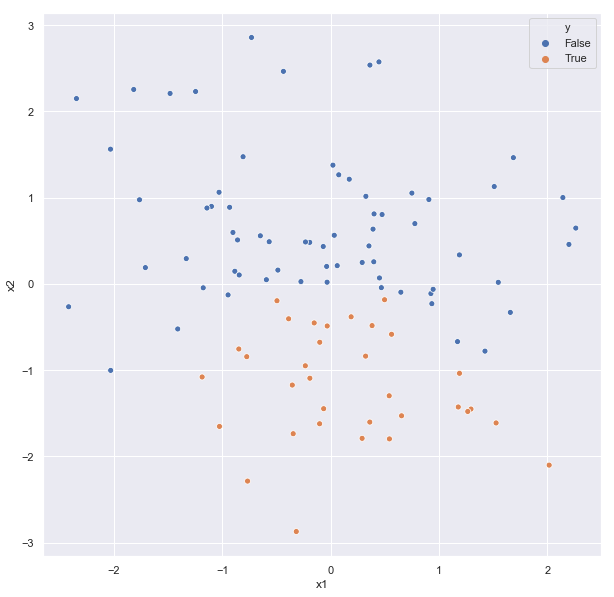

In [21]:
# plot the training data
sns.scatterplot(x='x1',y='x2',hue='y',data=train_df)

# calculate the naive classifier's error
print('naive classifier error: {}'.format(train_df.y.sum() / train_df.shape[0]))

linear model training error: 0.09999999999999998
linear model test error: 0.17000000000000004


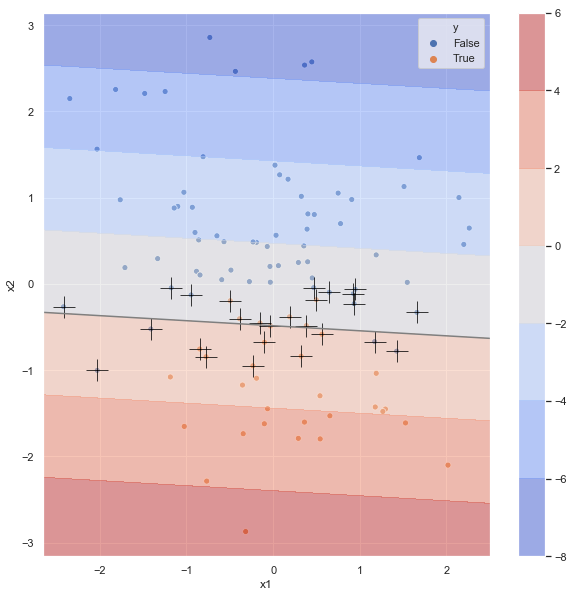

In [22]:
# Linear kernel

# plot the points
ax = sns.scatterplot(x='x1',y='x2',hue='y',data=train_df)
plt_x_min, plt_x_max  = ax.get_xlim()
plt_y_min, plt_y_max  = ax.get_ylim()

# obtain the hyperplane
train_x = train_df.drop('y', axis=1)
clf = svm.SVC(kernel='linear')
clf.fit(train_x, train_df.y)

# obtain the coefficients
coefs = pd.DataFrame(clf.coef_, columns=['x1', 'x2'])
coefs['i'] = pd.Series(clf.intercept_)

# plot the hyperplane
x1 = np.linspace(plt_x_min, plt_x_max, 2)
x2 = (-coefs['x1'][0] * x1 - coefs['i'][0]) / coefs['x2'][0]
sns.lineplot(x=x1, y=x2, color='tab:gray')

# plot the contours
xx1 = np.linspace(plt_x_min, plt_x_max, 100)
xx2 = np.linspace(plt_y_min, plt_y_max, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)
zz = (coefs['i'][0] \
      + (coefs['x1'][0] * xx1.ravel()) \
      + (coefs['x2'][0] * xx2.ravel())).reshape(xx1.shape)
plt.contourf(xx1, xx2, zz,cmap='coolwarm', alpha=0.5)
plt.colorbar()

# plot the support vectors
sns.scatterplot(x=clf.support_vectors_[:,0], \
                y=clf.support_vectors_[:,1], \
                color='black', marker='+', s=500)


# evaluate training performance
train_error = 1 - (clf.predict(train_x) == train_df.y).sum() / train_df.shape[0]
print('linear model training error: {}'.format(train_error))

# evaluate test performance
test_error = (1 - (clf.predict(test_x) == test_df.y).sum() / test_df.shape[0])
print('linear model test error: {}'.format(test_error))

polynomial model training error: 0.15000000000000002
polynomial model test error: 0.29000000000000004


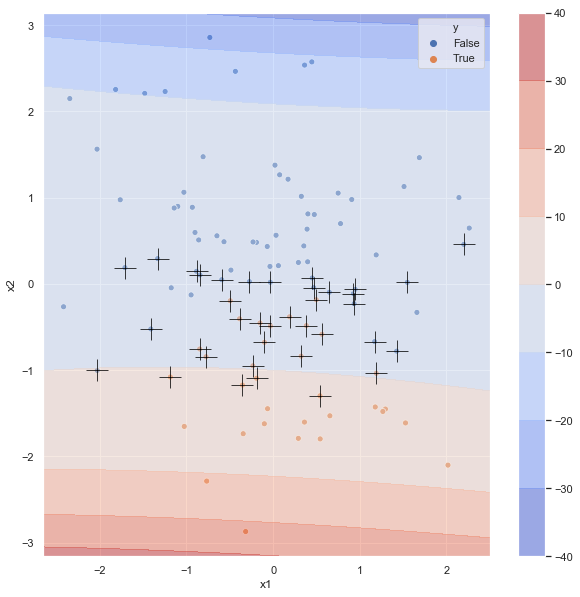

In [23]:
# Polynomial kernel

# plot the points
ax = sns.scatterplot(x='x1',y='x2',hue='y',data=train_df)
plt_x_min, plt_x_max  = ax.get_xlim()
plt_y_min, plt_y_max  = ax.get_ylim()

# obtain the hyperplane
train_x = train_df.drop('y', axis=1)
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(train_x, train_df.y)

# plot the contours
xx1 = np.linspace(plt_x_min, plt_x_max, 100)
xx2 = np.linspace(plt_y_min, plt_y_max, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)
zz = clf.decision_function(pd.DataFrame({'x1': xx1.ravel(),'x2': xx2.ravel()}))
plt.contourf(xx1, xx2, zz.reshape(xx1.shape), cmap='coolwarm', alpha=0.5)
plt.colorbar()

# plot the support vectors
sns.scatterplot(x=clf.support_vectors_[:,0], \
                y=clf.support_vectors_[:,1], \
                color='black', marker='+', s=500)


# evaluate training performance
train_error = 1 - (clf.predict(train_x) == train_df.y).sum() / train_df.shape[0]
print('polynomial model training error: {}'.format(train_error))

# evaluate test performance
test_error = (1 - (clf.predict(test_x) == test_df.y).sum() / test_df.shape[0])
print('polynomial model test error: {}'.format(test_error))

radial kernel training error: 0.020000000000000018
radial kernel test error: 0.050000000000000044


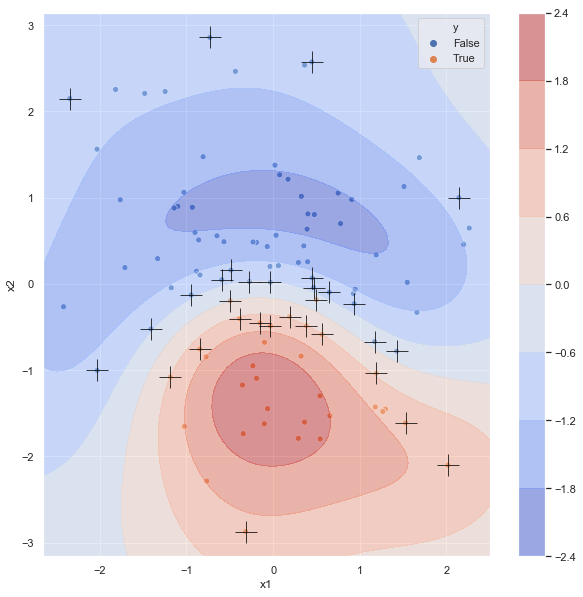

In [24]:
# Radial kernel

# plot the points
ax = sns.scatterplot(x='x1',y='x2',hue='y',data=train_df)
plt_x_min, plt_x_max  = ax.get_xlim()
plt_y_min, plt_y_max  = ax.get_ylim()

# obtain the hyperplane
train_x = train_df.drop('y', axis=1)
clf = svm.SVC(kernel='rbf')
clf.fit(train_x, train_df.y)

# plot the contours
xx1 = np.linspace(plt_x_min, plt_x_max, 100)
xx2 = np.linspace(plt_y_min, plt_y_max, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)
zz = clf.decision_function(pd.DataFrame({'x1': xx1.ravel(),'x2': xx2.ravel()}))
plt.contourf(xx1, xx2, zz.reshape(xx1.shape), cmap='coolwarm', alpha=0.5)
plt.colorbar()

# plot the support vectors
sns.scatterplot(x=clf.support_vectors_[:,0], \
                y=clf.support_vectors_[:,1], \
                color='black', marker='+', s=500)


# evaluate training performance
train_error = 1 - (clf.predict(train_x) == train_df.y).sum() / train_df.shape[0]
print('radial kernel training error: {}'.format(train_error))

# evaluate test performance
test_error = (1 - (clf.predict(test_x) == test_df.y).sum() / test_df.shape[0])
print('radial kernel test error: {}'.format(test_error))

5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

(a) Generate a data set with `n = 500` and `p = 2`, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

In [25]:
# Generate some data with quadratic decision boundry

def gen_y(x1, x2):
    y = (x1 ** 2) + (x2 ** 2)
    return  y > y.mean()

x1 = np.random.uniform(0,1, 500)
x2 = np.random.uniform(0,1, 500)
train_df_5 = pd.DataFrame({'x1': x1, 'x2' : x2, 'y': gen_y(x1, x2)})

(b) Plot the observations, colored according to their class labels. Your plot should display `X1` on the x-axis, and `X2` on the y-axis.

naive classifier error: 0.47


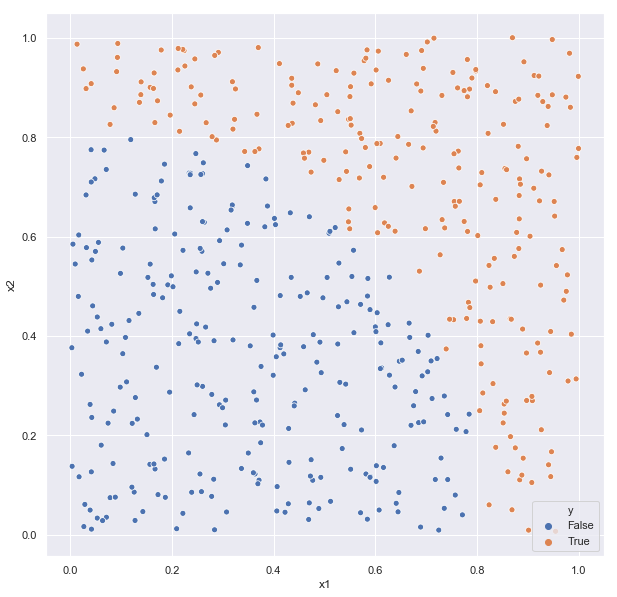

In [26]:
# plot the training data
sns.scatterplot(x='x1',y='x2',hue='y',data=train_df_5)

# calculate the naive classifier's error
print('naive classifier error: {}'.format(train_df_5.y.sum() / train_df_5.shape[0]))

(c) Fit a logistic regression model to the data, using `X1` and `X2` as predictors.

In [27]:
train_x = train_df_5.drop('y', axis=1)
train_y = train_df_5.y
logit = linear_model.LogisticRegression().fit(train_x, train_y)

(d) Apply this model to the training data in order to obtain a pre- dicted class label for each training observation. Plot the ob- servations, colored according to the predicted class labels. The decision boundary should be linear.

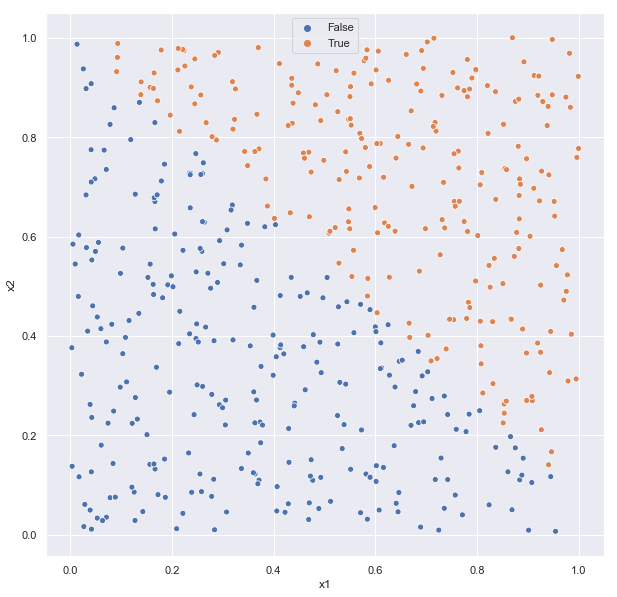

In [28]:
scatter_df = {'pred' : logit.predict(train_x),\
              'x1' : train_x.x1,\
              'x2' : train_x.x2}
sns.scatterplot(x='x1', y='x2', hue='pred', data = scatter_df)

(e) Now fit a logistic regression model to the data using non-linear functions of `X1` and `X2` as predictors (e.g. `X1^2, X1 Ã—X2, log(X2)`, and so forth).

In [29]:
d_matrix = pt.dmatrix('x1 + x2 + np.power(x1, 2) + np.power(x2, 2) + (x1 * x2)', train_df_5)
logit = linear_model.LogisticRegression(fit_intercept=False).fit(d_matrix, train_df_5.y)

(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the ob- servations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

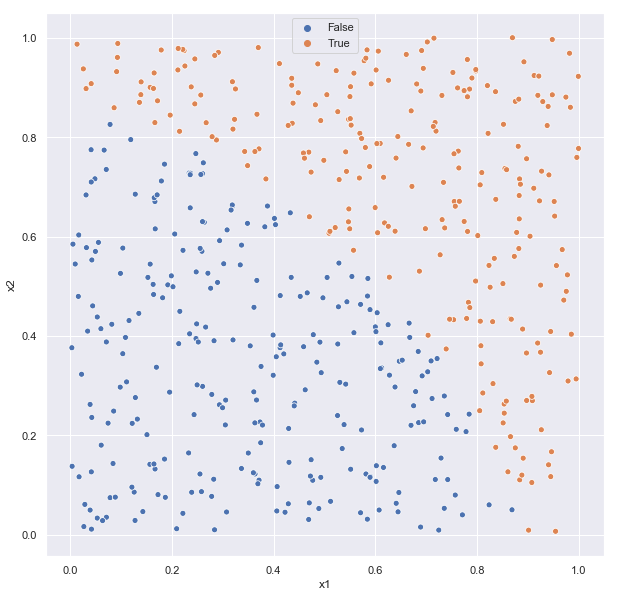

In [30]:
scatter_df = {'pred' : logit.predict(d_matrix),\
              'x1' : train_df_5.x1,\
              'x2' : train_df_5.x2}
sns.scatterplot(x='x1', y='x2', hue='pred', data = scatter_df)

(g) Fit a support vector classifier to the data with `X1` and `X2` as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

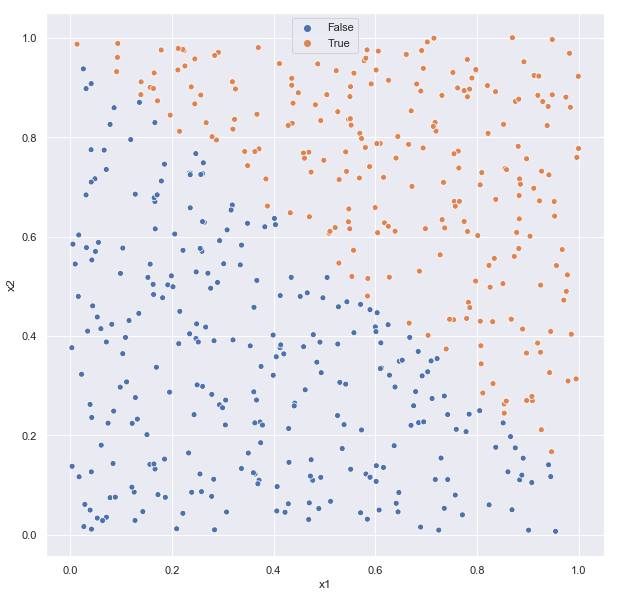

In [31]:
train_x = train_df_5.drop('y', axis=1)
clf = svm.SVC(kernel='linear')
clf.fit(train_x, train_df_5.y)

scatter_df = {'pred' : clf.predict(train_x),\
              'x1' : train_df_5.x1,\
              'x2' : train_df_5.x2}
sns.scatterplot(x='x1', y='x2', hue='pred', data = scatter_df)

(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

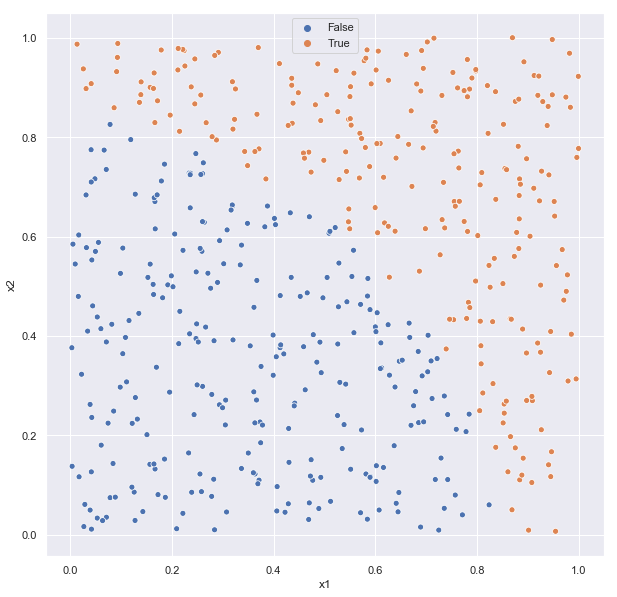

In [32]:
train_x = train_df_5.drop('y', axis=1)
clf = svm.SVC(kernel='rbf')
clf.fit(train_x, train_df_5.y)

scatter_df = {'pred' : clf.predict(train_x),\
              'x1' : train_df_5.x1,\
              'x2' : train_df_5.x2}
sns.scatterplot(x='x1', y='x2', hue='pred', data = scatter_df)

6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate this claim.

(a) Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.

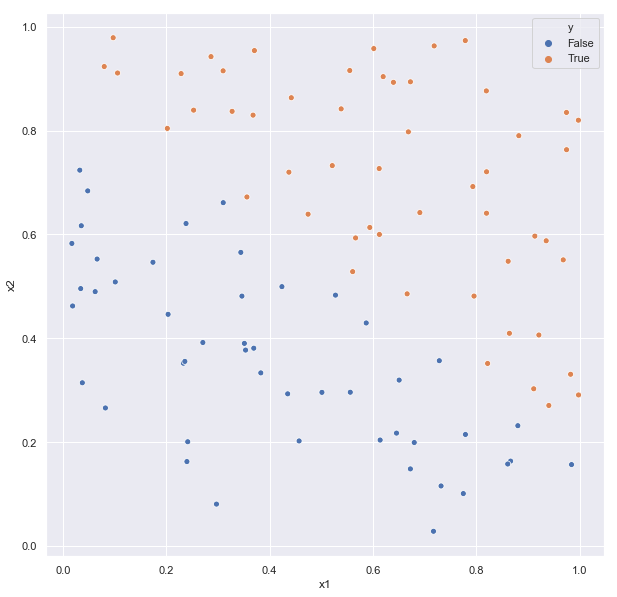

In [33]:
x1 = np.random.uniform(0, 1, 100)
x2 = np.random.uniform(0, 1, 100)
train_df_6 = pd.DataFrame({'x1': x1, 'x2' : x2})
lin_comb = train_df_6.values @ np.array([2,3])
train_df_6['y'] = lin_comb > lin_comb.mean()

sns.scatterplot(x='x1', y='x2', hue='y', data=train_df_6)

(b) Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?


In [40]:
# training errors 
c_range = np.linspace(1, 500, 500) 
errors = []
for c in c_range:
    #train
    train_x = train_df_6.drop('y', axis=1)
    train_y = train_df_6.y
    clf = svm.SVC(kernel='linear', C=c).fit(train_x, train_y)
    error = (clf.predict(train_x) != train_y).sum()
    errors.append(error)

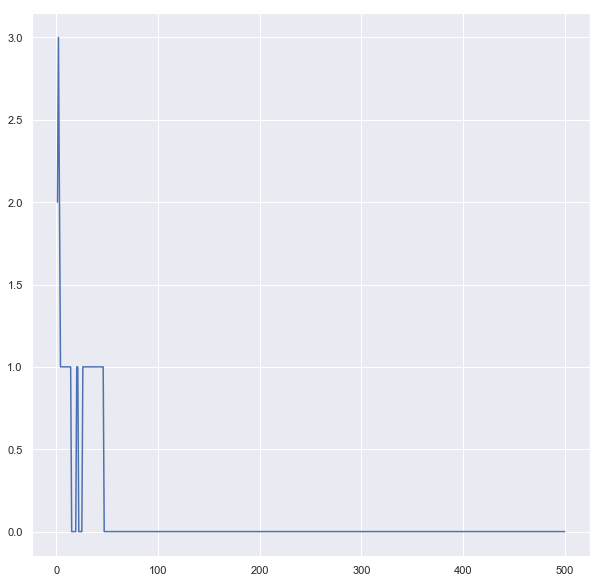

In [41]:
sns.lineplot(x=c_range, y=errors)

In [43]:
# cross validation errors
cv_result = pd.DataFrame()
for train_idx, test_idx in model_selection.KFold(n_splits=10).split(train_df_6):
    train, test = train_df_6.iloc[train_idx], train_df_6.iloc[test_idx]
    errors = []
    c_range = np.linspace(1, 500, 500) 
    for c in c_range:
        #train
        train_x = train.drop('y', axis=1)
        train_y = train.y
        clf = svm.SVC(kernel='linear', C=c).fit(train_x, train_y)
        #test
        test_x = test.drop('y', axis=1)
        test_y = test.y
        error = (clf.predict(test_x) != test_y).sum()
        errors.append(error)
    cv_result = cv_result.append(pd.Series(errors, index=c_range), ignore_index=True)

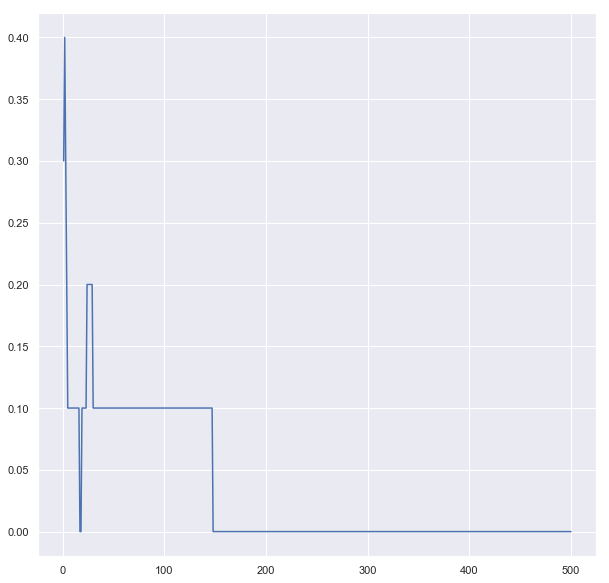

In [44]:
mean = cv_result.mean()
sns.lineplot(x=mean.index, y=mean)

In [47]:
# test errors
x1 = np.random.uniform(0, 1, 1000)
x2 = np.random.uniform(0, 1, 1000)
test_df_6 = pd.DataFrame({'x1': x1, 'x2' : x2})
lin_comb = test_df_6.values @ np.array([2,3])
test_df_6['y'] = lin_comb > lin_comb.mean()

# training errors 
c_range = np.linspace(1, 500, 500) 
errors = []
for c in c_range:
    #train
    train_x = train_df_6.drop('y', axis=1)
    train_y = train_df_6.y
    clf = svm.SVC(kernel='linear', C=c).fit(train_x, train_y)
    #test
    test_x = test_df_6.drop('y', axis=1)
    test_y = test_df_6.y
    error = (clf.predict(test_x) != test_y).sum()
    errors.append(error)

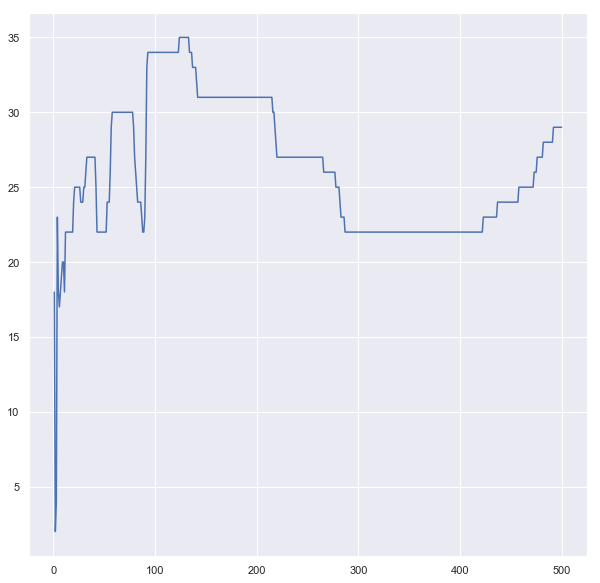

In [48]:
sns.lineplot(x=c_range, y=errors)

7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [71]:
auto_df = pd.read_csv('auto.csv').drop('name', axis=1)
auto_df.mpg = auto_df.mpg > auto_df.mpg.median()
auto_df.horsepower = pd.to_numeric(auto_df.horsepower, errors='coercce')
auto_df = auto_df.dropna()
tmp = auto_df.drop('mpg', axis=1)
tmp = (tmp - tmp.mean()) / tmp.std()
tmp['mpg'] = auto_df.mpg
auto_df = tmp
auto_df.head()

cylinders  displacement  horsepower    weight  acceleration      year  \
0   1.482053      1.075915    0.663285  0.619748     -1.283618 -1.623241   
1   1.482053      1.486832    1.572585  0.842258     -1.464852 -1.623241   
2   1.482053      1.181033    1.182885  0.539692     -1.646086 -1.623241   
3   1.482053      1.047246    1.182885  0.536160     -1.283618 -1.623241   
4   1.482053      1.028134    0.923085  0.554997     -1.827320 -1.623241   

     origin    mpg  
0 -0.715726  False  
1 -0.715726  False  
2 -0.715726  False  
3 -0.715726  False  
4 -0.715726  False

(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

In [84]:
# cross validation errors

cv_result = pd.DataFrame()
for train_idx, test_idx in model_selection.KFold(n_splits=5).split(auto_df):
    train, test = auto_df.iloc[train_idx], auto_df.iloc[test_idx]
    errors = []
    c_range = np.linspace(0.1, 20, 200) 
    for c in c_range:
        #train
        train_x = train.drop('mpg', axis=1)
        train_y = train.mpg
        clf = svm.SVC(kernel='linear', C=c).fit(train_x, train_y)
        #test
        test_x = test.drop('mpg', axis=1)
        test_y = test.mpg
        error = (clf.predict(test_x) != test_y).sum()
        errors.append(error)
    cv_result = cv_result.append(pd.Series(errors, index=c_range), ignore_index=True)

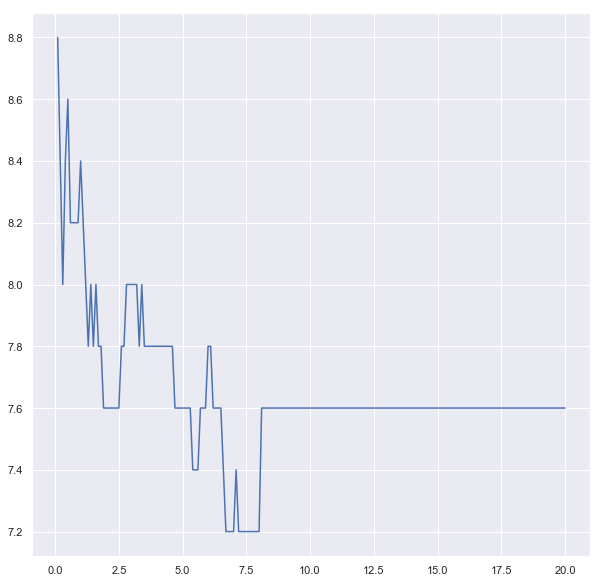

In [85]:
mean = cv_result.mean()
sns.lineplot(x=mean.index, y=mean)

c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost.

In [92]:
# cross validation errors

def rbf_cv(gamma):
    cv_result = pd.DataFrame()
    for train_idx, test_idx in model_selection.KFold(n_splits=5).split(auto_df):
        train, test = auto_df.iloc[train_idx], auto_df.iloc[test_idx]
        errors = []
        c_range = np.linspace(0.1, 40, 400) 
        for c in c_range:
            #train
            train_x = train.drop('mpg', axis=1)
            train_y = train.mpg
            clf = svm.SVC(kernel='rbf', C=c, gamma=gamma).fit(train_x, train_y)
            #test
            test_x = test.drop('mpg', axis=1)
            test_y = test.mpg
            error = (clf.predict(test_x) != test_y).sum()
            errors.append(error)
        cv_result = cv_result.append(pd.Series(errors, index=c_range), ignore_index=True)
    return cv_result

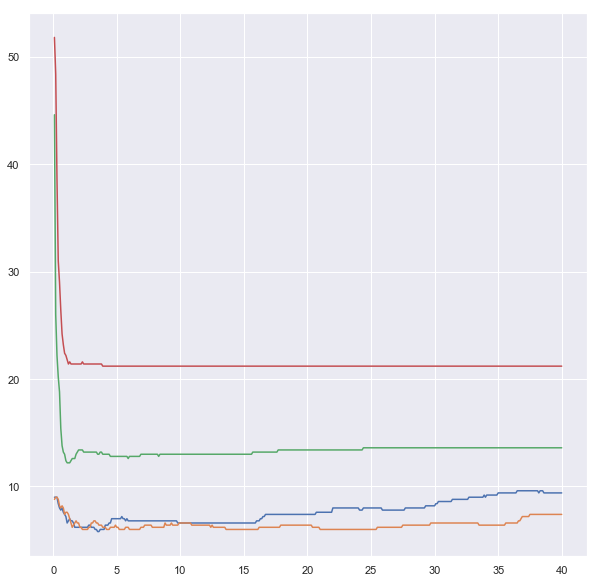

In [118]:
# TODO: sample a denser and wider range of g.. it takes ages.
for g in ['auto'] + list(np.linspace(0.1, 5, 3)):
    mean = rbf_cv(g).mean()
    sns.lineplot(x=mean.index, y=mean)

8. This problem involves the OJ data set which is part of the ISLR package.

In [124]:
oj_df = pd.read_csv('oj.csv')
oj_df = oj_df.drop(oj_df.columns[0], axis=1)
oj_df.Store7 = oj_df.Store7.map({'Yes' : 1, 'No' : 0})
oj_df.head()

tmp = oj_df.drop('Purchase', axis=1)
tmp = (tmp - tmp.mean()) / tmp.std()
tmp['Purchase'] = oj_df.Purchase
oj_df = tmp
oj_df.head()

WeekofPurchase   StoreID   PriceCH   PriceMM    DiscCH    DiscMM  \
0       -1.117174 -1.281868 -1.151523 -0.709981 -0.441457 -0.576918   
1       -0.988625 -1.281868 -1.151523 -0.709981 -0.441457  0.826041   
2       -0.602978 -1.281868 -0.072772  0.034146  1.005669 -0.576918   
3       -1.759918 -1.281868 -1.739933 -2.942365 -0.441457 -0.576918   
4       -1.695644  1.316678 -1.739933 -2.942365 -0.441457 -0.576918   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
0  -0.416033  -0.438959 -0.213688     0.110620    -0.457240   0.344355   
1  -0.416033   2.275989  0.111153    -1.076571    -0.457240  -0.760362   
2  -0.416033  -0.438959  0.371026     0.506350    -0.875698   0.933538   
3  -0.416033  -0.438959 -0.538530    -1.076571    -0.875698  -0.539419   
4  -0.416033  -0.438959  1.269326    -1.076571    -0.875698  -0.539419   

     Store7  PctDiscMM  PctDiscCH  ListPriceDiff     STORE Purchase  
0 -0.705786  -0.582728  -0.438901       0.204671 -0.441028       CH  
1 -0.705786   0.898738  -0.438901       0.204671 -0.441028       CH  
2 -0.705786  -0.582728   1.029756       0.111678 -0.441028       CH  
3 -0.705786  -0.582728  -0.438901      -2.027152 -0.441028       MM  
4  1.415536  -0.582728  -0.438901      -2.027152 -1.140140       CH

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [125]:
train, test = model_selection.train_test_split(oj_df, test_size=oj_df.shape[0] - 800)

(b) Fit a support vector classifier to the training data using
`cost=0.01`, with Purchase as the response and the other variables as predictors.

In [149]:
train_x = train.drop('Purchase', axis=1)
train_y = train.Purchase
test_x = test.drop('Purchase', axis=1)
test_y = test.Purchase

clf = svm.SVC(kernel='linear', C=0.01).fit(train_x, train_y)

(c) What are the training and test error rates?

In [150]:
train_error = 1 - (clf.predict(train_x) == train_y).sum() / train_x.shape[0]
print('train error: {}'.format(train_error))

test_error = 1 - (clf.predict(test_x) == test_y).sum() / test_x.shape[0]
print('test error: {}'.format(test_error))

train error: 0.15186915887850472
test error: 0.23364485981308414


(d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

.. no such luxury in python world

In [160]:
cv_result = pd.DataFrame()
for train_idx, test_idx in model_selection.KFold(n_splits=5).split(oj_df):
    train, test = oj_df.iloc[train_idx], oj_df.iloc[test_idx]
    errors = []
    c_range = np.linspace(0.01, 10, 200) 
    for c in c_range:
        #train
        train_x = train.drop('Purchase', axis=1)
        train_y = train.Purchase
        clf = svm.SVC(kernel='linear', C=c).fit(train_x, train_y)
        #test
        test_x = test.drop('Purchase', axis=1)
        test_y = test.Purchase
        error = (clf.predict(test_x) != test_y).sum() / test_x.shape[0]
        errors.append(error)
    cv_result = cv_result.append(pd.Series(errors, index=c_range), ignore_index=True)

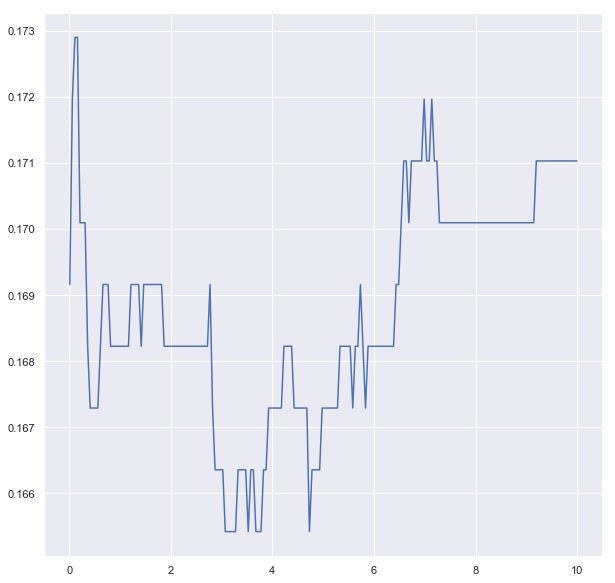

In [153]:
line_df = cv_result.mean()
sns.lineplot(x=line_df.index, y=line_df)

(e) Compute the training and test error rates using this new value
for cost.

.. the error is all over the place 

In [154]:
clf = svm.SVC(kernel='linear', C=2.75).fit(train_x, train_y)

train_error = 1 - (clf.predict(train_x) == train_y).sum() / train_x.shape[0]
print('train error: {}'.format(train_error))

test_error = 1 - (clf.predict(test_x) == test_y).sum() / test_x.shape[0]
print('test error: {}'.format(test_error))

train error: 0.14719626168224298
test error: 0.23364485981308414


(f) Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma.

In [159]:
cv_result = pd.DataFrame()
for train_idx, test_idx in model_selection.KFold(n_splits=5).split(oj_df):
    train, test = oj_df.iloc[train_idx], oj_df.iloc[test_idx]
    errors = []
    c_range = np.linspace(0.01, 10, 200) 
    for c in c_range:
        #train
        train_x = train.drop('Purchase', axis=1)
        train_y = train.Purchase
        clf = svm.SVC(kernel='rbf', C=c).fit(train_x, train_y)
        #test
        test_x = test.drop('Purchase', axis=1)
        test_y = test.Purchase
        error = (clf.predict(test_x) != test_y).sum() / test_x.shape[0]
        errors.append(error)
    cv_result = cv_result.append(pd.Series(errors, index=c_range), ignore_index=True)

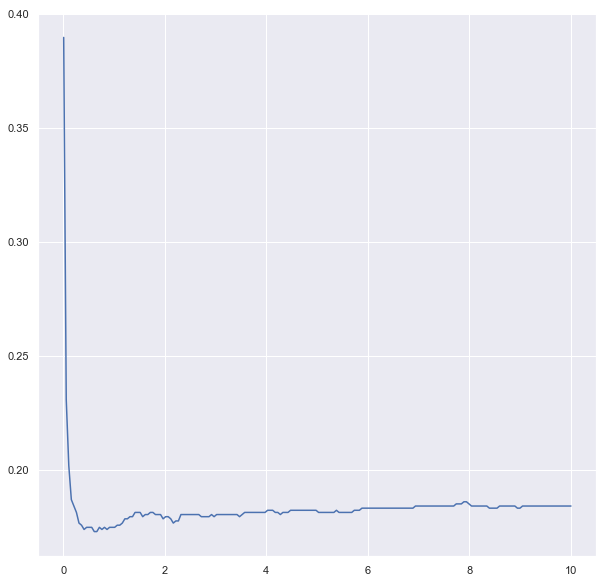

In [157]:
line_df = cv_result.mean()
sns.lineplot(x=line_df.index, y=line_df)

In [158]:
clf = svm.SVC(kernel='rbf', C=10).fit(train_x, train_y)

train_error = 1 - (clf.predict(train_x) == train_y).sum() / train_x.shape[0]
print('train error: {}'.format(train_error))

test_error = 1 - (clf.predict(test_x) == test_y).sum() / test_x.shape[0]
print('test error: {}'.format(test_error))

train error: 0.139018691588785
test error: 0.21962616822429903


(g) Repeat parts (b) through (e) using a support vector machine
with a polynomial kernel. Set degree=2.

In [162]:
cv_result = pd.DataFrame()
for train_idx, test_idx in model_selection.KFold(n_splits=5).split(oj_df):
    train, test = oj_df.iloc[train_idx], oj_df.iloc[test_idx]
    errors = []
    c_range = np.linspace(0.01, 10, 200) 
    for c in c_range:
        #train
        train_x = train.drop('Purchase', axis=1)
        train_y = train.Purchase
        clf = svm.SVC(kernel='poly', degree=2, C=c).fit(train_x, train_y)
        #test
        test_x = test.drop('Purchase', axis=1)
        test_y = test.Purchase
        error = (clf.predict(test_x) != test_y).sum() / test_x.shape[0]
        errors.append(error)
    cv_result = cv_result.append(pd.Series(errors, index=c_range), ignore_index=True)

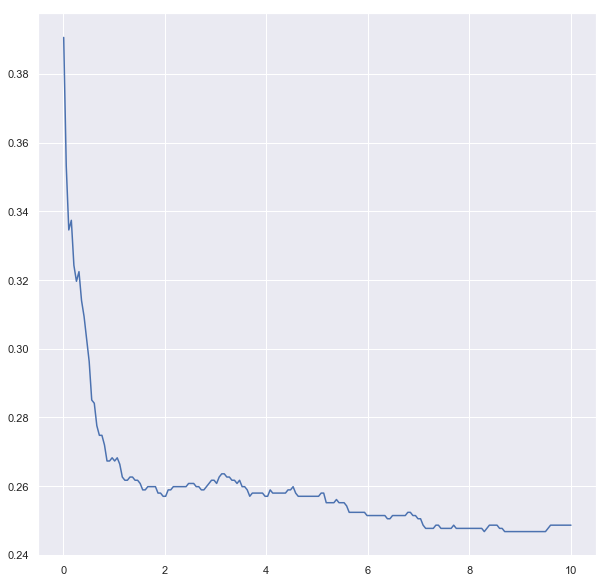

In [163]:
line_df = cv_result.mean()
sns.lineplot(x=line_df.index, y=line_df)

In [164]:
clf = svm.SVC(kernel='poly', degree=2, C=10).fit(train_x, train_y)

train_error = 1 - (clf.predict(train_x) == train_y).sum() / train_x.shape[0]
print('train error: {}'.format(train_error))

test_error = 1 - (clf.predict(test_x) == test_y).sum() / test_x.shape[0]
print('test error: {}'.format(test_error))

train error: 0.2079439252336449
test error: 0.26168224299065423


(h) Overall, which approach seems to give the best results on this data?

- lowest test error is obtained with the radial kernel